# Metropolis - Hastings Algorithm

In [1]:
from collections import Counter
from random import randint, random, choices

import numpy as np

from scipy.stats import binom
from matplotlib import pyplot as plt

In [2]:
def generate_markov_chain(k):
    return np.apply_along_axis(lambda x: np.random.dirichlet(alpha=np.ones(k + 1), size=1).flatten(),
                               axis=1, arr=np.empty([k + 1, k + 1]))

## Our Distribution

In [3]:
cases = 20
probabily = 0.2

pi = binom.pmf(np.arange(0, cases + 1),cases, probabily).reshape(cases + 1, 1)

## Preparing Simulation... 

In [4]:
Q = generate_markov_chain(cases)
A = np.minimum(1, (pi * Q).T / (pi * Q))

## Launching Simulation...

In [5]:
sampled = Counter()
current = randint(0, cases)
sampled[current] += 1
for _ in range(int(10e3)):
    proposed = choices(range(cases + 1), weights=Q[current,:].tolist())[0]
    if random() <= A[current, proposed]:
        current = proposed
    sampled[current] += 1

## Processing Results...

In [6]:
pi_simulated = np.empty(cases + 1)
for k, v in sampled.items():
    pi_simulated[k] = v 
pi_simulated = pi_simulated / sum(pi_simulated)

## Plotting Results...

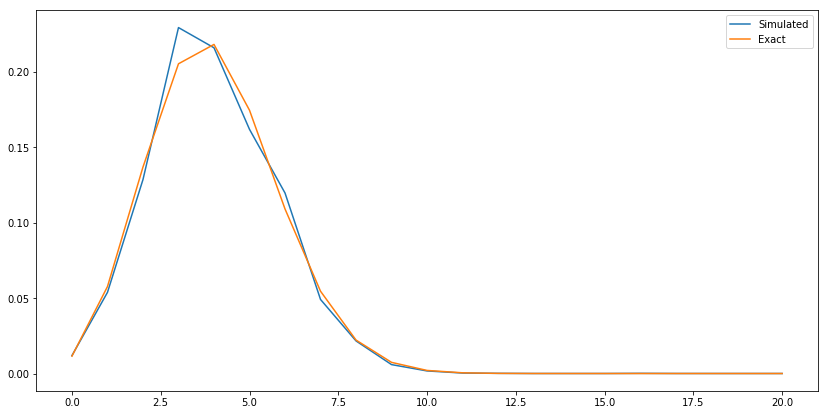

In [7]:
plt.rcParams["figure.figsize"]= 14, 7
plt.plot(pi_simulated, label = "Simulated")
plt.plot(pi, label = "Exact")
plt.legend()
plt.show()